# Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 70000)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the csv file

In [ ]:
df_ = pd.read_csv("/content/sample_data/Travel.csv")

# Feature Engineering

### Look at the top 5 records of data

In [ ]:
df_.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Shape

In [ ]:
df_.shape

(4888, 20)

### Feature Names

In [ ]:
df_.columns.values

array(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype=object)

### Data Types of Each Column

In [ ]:
df_.dtypes

,0
CustomerID,int64
ProdTaken,int64
Age,float64
TypeofContact,object
CityTier,int64
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64
NumberOfFollowups,float64


# Concise Summary of the Dataframe

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Print unique values for each column in the DataFrame

In [ ]:
for col in df_.columns:
    print(f"{col} : {df_[col].unique()}\n")

CustomerID : [200000 200001 200002 ... 204885 204886 204887]

ProdTaken : [1 0]

Age : [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]

TypeofContact : ['Self Enquiry' 'Company Invited' nan]

CityTier : [3 1 2]

DurationOfPitch : [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]

Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender : ['Female' 'Male' 'Fe Male']

NumberOfPersonVisiting : [3 2 1 4 5]

NumberOfFollowups : [ 3.  4.  2.  5. nan  1.  6.]

ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

PreferredPropertyStar : [ 3.  4.  5. nan]

MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']

NumberOfTrips : [ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]

Passpor

- Columns like CustomerID, ProdTaken, CityTier, PreferredPropertyStar, Passport, and OwnCar should be converted to object data types.                          

- In the <b>Occupation column</b>, replace "Free Lancer" with "Freelancer."

- In the <b>Gender</b> column, replace "Fe male" with "Female."

- In the <b>MaritalStatus</b> column, replace "unmarried" with "single" as they have the same meaning.

In [ ]:
for i in ["CustomerID", "ProdTaken", "CityTier", "PreferredPropertyStar", "Passport", "OwnCar"]:
    df_[i] = df_[i].astype(str)
df_.replace('nan', np.nan, inplace=True)

In [ ]:
df_.dtypes

,0
CustomerID,object
ProdTaken,object
Age,float64
TypeofContact,object
CityTier,object
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64
NumberOfFollowups,float64


In [ ]:
df_["Occupation"] = df_["Occupation"].replace("Free Lancer", "Freelancer")
df_["Gender"] = df_["Gender"].replace("Fe Male", "Female")
df_["MaritalStatus"] = df_["MaritalStatus"].replace("Unmarried", "Single")

# Statistical Summary

## 1. Numerical Columns

In [ ]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


- <b>Age</b>: Average customer age is 37 years, with most individuals aged between 31 and 44, and ages ranging from 18 to 61.

- <b>DurationOfPitch</b>: Average pitch duration is 15.49 minutes.

- <b>NumberOfPersonVisiting</b>: Most visits include 2 to 3 people.

- <b>NumberOfFollowups</b>: Typically requires 3 to 4 follow-ups per customer.

- <b>NumberOfTrips</b>: Average number of trips per customer is 3.

- <b>PitchSatisfactionScore</b>: Average satisfaction score is around 3 out of 5.

- <b>NumberOfChildrenVisiting</b>: Most visits include 1 to 2 children.

- <b>MonthlyIncome</b>: Average monthly income of customers is approximately 24,000.

## 2. Categorical Columms

In [ ]:
df_.describe(include="object").T

,count,unique,top,freq
CustomerID,4888,4888,200000,1
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3.0,2993
MaritalStatus,4888,3,Married,2340
Passport,4888,2,0,3466


- <b>ProdTaken</b>: 18.8% of customers took the product, indicating low adoption.

- <b>TypeofContact</b>: 70.8% are self enquiries.

- <b>CityTier</b>: Most customers are from tier 1 cities.

- <b>Occupation</b>: 48.5% are salaried employees.

- <b>Gender</b>: 59.7% are male.

- <b>ProductPitched</b>: 37.7% were pitched the basic product.

- <b>PreferredPropertyStar</b>: Most customers prefer 3 properties.

- <b>MaritalStatus</b>: 47.9% are married.

- <b>Passport</b>: 29% of customers have a passport.

- <b>OwnCar</b>: 62% of customers own a car.

- <b>Designation</b>: 37.7% are executives.

# Checking for Duplicated Records

In [ ]:
df_.duplicated().sum()

0

- There is no duplicate records.

# Numerical DataFrame

In [ ]:
num_df = df_.select_dtypes("number")
num_df.head()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,6.0,3,3.0,1.0,2,0.0,20993.0
1,49.0,14.0,3,4.0,2.0,3,2.0,20130.0
2,37.0,8.0,3,4.0,7.0,3,0.0,17090.0
3,33.0,9.0,2,3.0,2.0,5,1.0,17909.0
4,NaN,8.0,2,3.0,1.0,5,0.0,18468.0


# Categorical DataFrame

In [ ]:
cat_df = df_.select_dtypes("O")
cat_df.head()

,CustomerID,ProdTaken,TypeofContact,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation
0,200000,1,Self Enquiry,3,Salaried,Female,Deluxe,3.0,Single,1,1,Manager
1,200001,0,Company Invited,1,Salaried,Male,Deluxe,4.0,Divorced,0,1,Manager
2,200002,1,Self Enquiry,1,Freelancer,Male,Basic,3.0,Single,1,0,Executive
3,200003,0,Company Invited,1,Salaried,Female,Basic,3.0,Divorced,1,1,Executive
4,200004,0,Self Enquiry,1,Small Business,Male,Basic,4.0,Divorced,0,1,Executive


# Missing Data

### 1. Numerical Columns

In [ ]:
missing_value_percentage =  round((num_df.isnull().sum() / df_.shape[0]) * 100, 0)
missing_value_percentage

,0
Age,5.0
DurationOfPitch,5.0
NumberOfPersonVisiting,0.0
NumberOfFollowups,1.0
NumberOfTrips,3.0
PitchSatisfactionScore,0.0
NumberOfChildrenVisiting,1.0
MonthlyIncome,5.0


In [ ]:
missing_value_num_df = pd.DataFrame(missing_value_percentage).reset_index()
missing_value_num_df.columns = ["column", "missing_value_percentage"]
missing_value_num_df

,column,missing_value_percentage
0,Age,5.0
1,DurationOfPitch,5.0
2,NumberOfPersonVisiting,0.0
3,NumberOfFollowups,1.0
4,NumberOfTrips,3.0
5,PitchSatisfactionScore,0.0
6,NumberOfChildrenVisiting,1.0
7,MonthlyIncome,5.0


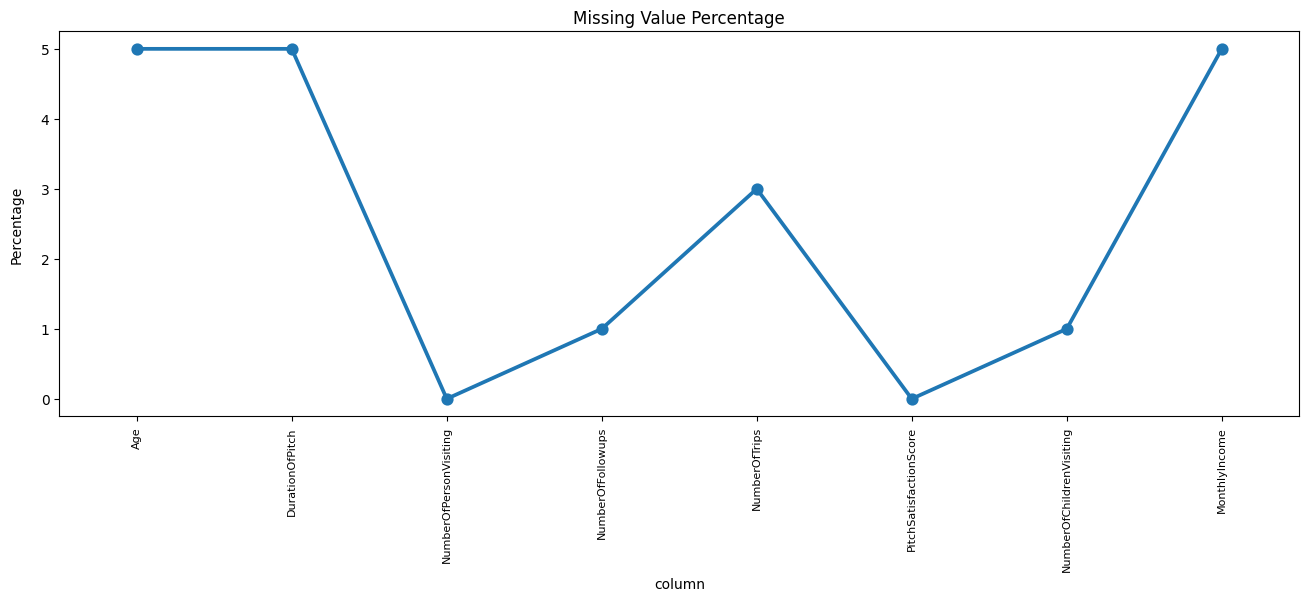

In [ ]:
plt.figure(figsize=(16,5))
sns.pointplot(x="column", y="missing_value_percentage", data=missing_value_num_df)
plt.xticks(rotation=90, fontsize=8)
plt.title("Missing Value Percentage")
plt.ylabel("Percentage", labelpad=12)
plt.show()

<b>Columns with missing values</b>:

- Age : 5%
- DurationOfPitch : 5%
- NumberOfFollowups : 1 %
- NumberOfTrips : 3%
- NumberOfChildrenVisiting : 1%
- MonthlyIncome : 5%

### 2. Categorical Columns

In [ ]:
missing_value_percentage = round((cat_df.isnull().sum() / df_.shape[0]) * 100, 0)
missing_value_percentage

,0
CustomerID,0.0
ProdTaken,0.0
TypeofContact,1.0
CityTier,0.0
Occupation,0.0
Gender,0.0
ProductPitched,0.0
PreferredPropertyStar,1.0
MaritalStatus,0.0
Passport,0.0


In [ ]:
missing_value_cat_df = pd.DataFrame(missing_value_percentage).reset_index()
missing_value_cat_df.columns = ["column", "missing_value_percentage"]
missing_value_cat_df

,column,missing_value_percentage
0,CustomerID,0.0
1,ProdTaken,0.0
2,TypeofContact,1.0
3,CityTier,0.0
4,Occupation,0.0
5,Gender,0.0
6,ProductPitched,0.0
7,PreferredPropertyStar,1.0
8,MaritalStatus,0.0
9,Passport,0.0


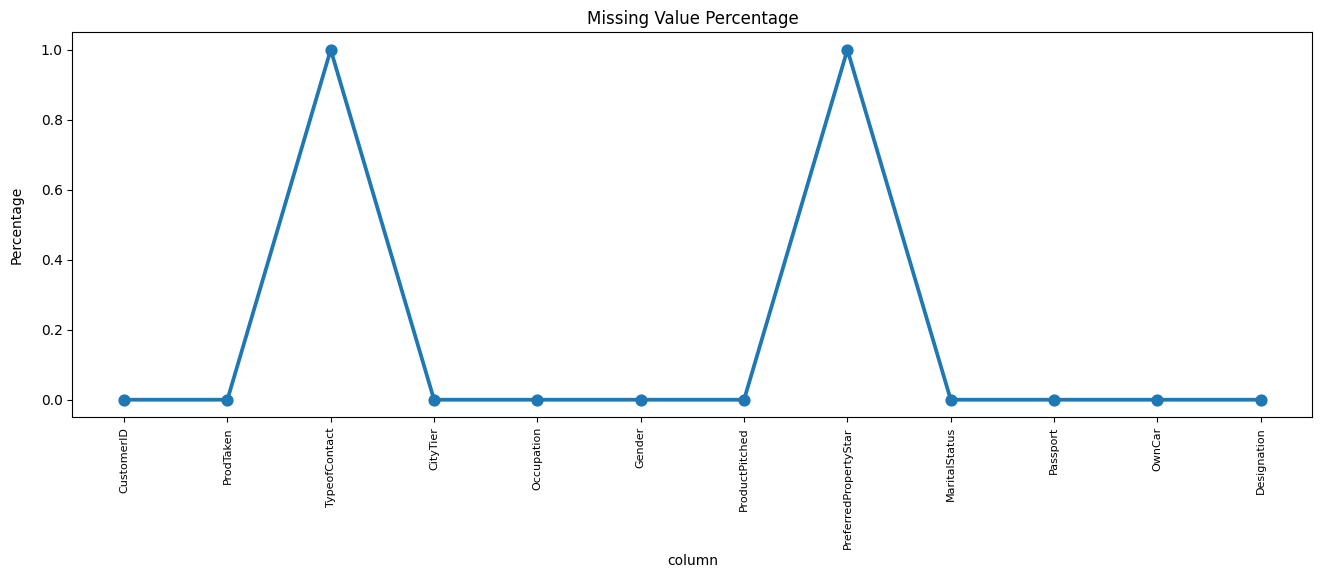

In [ ]:
plt.figure(figsize=(16,5))
sns.pointplot(x="column", y="missing_value_percentage", data=missing_value_cat_df)
plt.xticks(rotation=90, fontsize=8)
plt.title("Missing Value Percentage")
plt.ylabel("Percentage", labelpad=12)
plt.show()

Column with missing values:

- TypeofContact : 1%
- PreferredPropertyStar : 1%

<b>General Thumb Rules:</b>

- For features with less missing values, we generally predict missing values using a prediction model or fill with mean/median/mode depending on the feature.

- For features with a very high number of missing values, it is better to drop those columns as they give very less insights on analysis.

There is no thumb rule on what criteria we should use to delete the columns with a high number of missing values, but generally, we can delete the columns if we have more than 30–40% of missing values. But again, there is a catch here. For example, is_car & car_type, People having no cars, will obviously have car_type as NaN (null), but that doesn't make this column useless, so the decision has to be taken wisely.

# Outliers

In [ ]:
def detect_outliers(df, column):
    Q1 = num_df[column].quantile(0.25)
    Q3 = num_df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = num_df[(df[column] < lower_bound) | (num_df[column] > upper_bound)][column].tolist()
    return len(outliers), outliers

for column in num_df.columns:
    num_outliers, outliers_list = detect_outliers(num_df, column)
    print(f"Column '{column}' has outliers: {num_outliers}")
    print(f"Outliers: {outliers_list}\n")

Column 'Age' has outliers: 0
Outliers: []

Column 'DurationOfPitch' has outliers: 2
Outliers: [126.0, 127.0]

Column 'NumberOfPersonVisiting' has outliers: 3
Outliers: [5, 5, 5]

Column 'NumberOfFollowups' has outliers: 312
Outliers: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

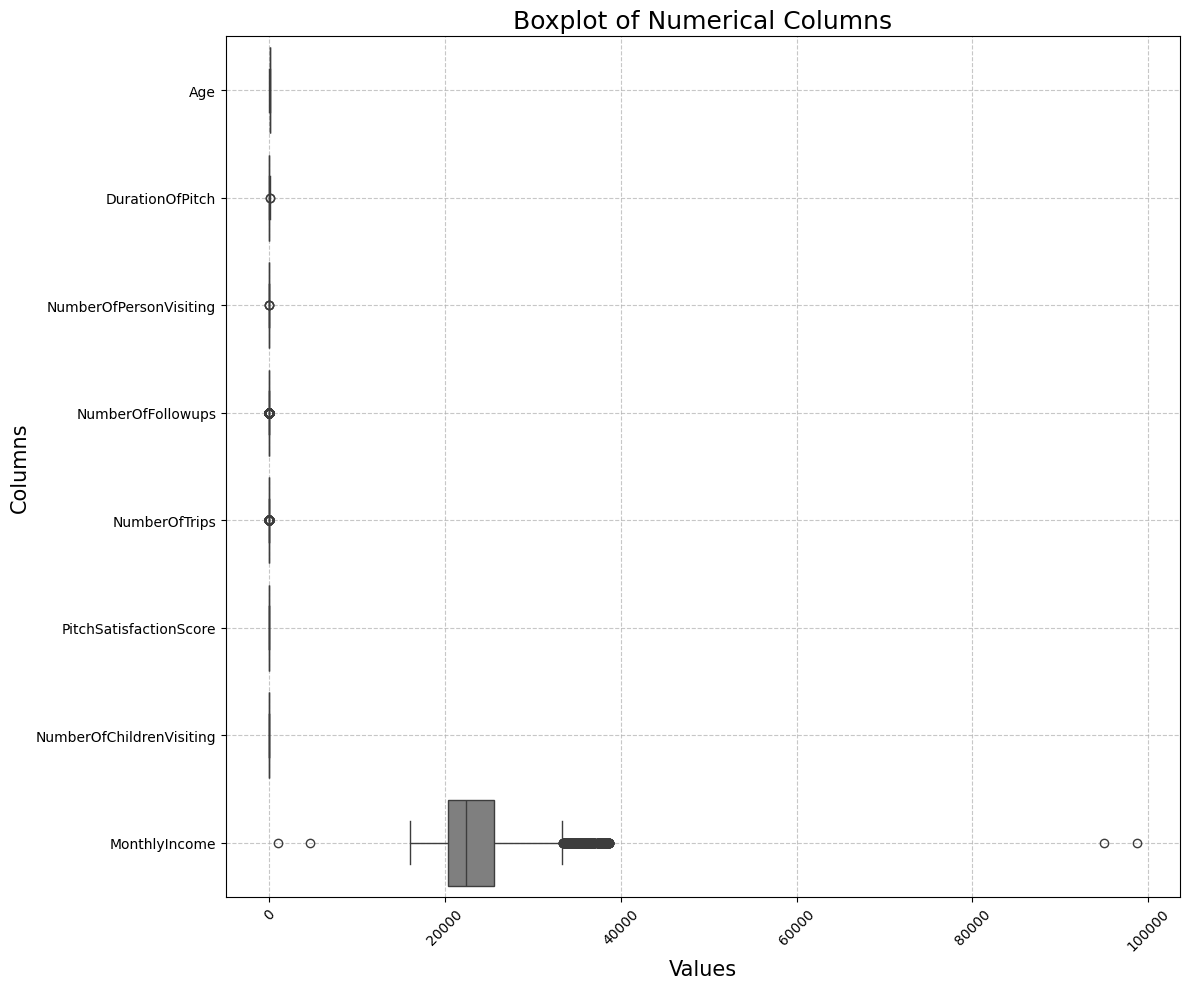

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=num_df, orient="h")
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.xlabel('Values', fontsize=15)
plt.ylabel('Columns', fontsize=15)

plt.title('Boxplot of Numerical Columns', fontsize=18)

plt.tight_layout()
plt.show()

# Missing Values - Treatment

### 1. Numerical Columns

In [ ]:
num_df.skew()

,0
Age,0.382989
DurationOfPitch,1.752037
NumberOfPersonVisiting,0.029817
NumberOfFollowups,-0.372719
NumberOfTrips,1.453884
PitchSatisfactionScore,-0.127726
NumberOfChildrenVisiting,0.272199
MonthlyIncome,1.949160


<b>Imputation Strategy:</b>

- Use median when data is skewed or having outliers.
- Use mean when data distribution is almost normal (less or no skew) and has less or no outliers.

- When a column has outliers, it affects the mean but not much the median.
- Mean is influenced by skewness, whereas median is not affected by the shape of the distribution.

- Column has skewness (use median).
- Column has outliers (use median).
- Column has no skewness (use mean).
- Column has no outliers (use mean or median).
- Column has skewness but no outliers (use median)
- Column has outliers but no skewness (use mean).

- mean:  NumberOfPersonVisiting,
- median: Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips, PitchSatisfactionScore , NumberOfChildrenVisiting, MonthlyIncome

In [ ]:
for i in num_df.columns:
    if i == "NumberOfPersonVisiting":
        df_[i] = df_[i].fillna(df_[i].mean())
    else:
        df_[i] = df_[i].fillna(df_[i].median())

In [ ]:
for i in df_.columns:
    if df_[i].dtypes != "object":
        print(f"{i} : {df_[i].isnull().sum()}")

Age : 0
DurationOfPitch : 0
NumberOfPersonVisiting : 0
NumberOfFollowups : 0
NumberOfTrips : 0
PitchSatisfactionScore : 0
NumberOfChildrenVisiting : 0
MonthlyIncome : 0


### 2. Categorical Columns

In [ ]:
for i in cat_df.columns:
    df_[i] = df_[i].fillna(df_[i].mode()[0])

In [ ]:
for i in df_.columns:
    if df_[i].dtypes == "object":
        print(f"{i} : {df_[i].isnull().sum()}")

CustomerID : 0
ProdTaken : 0
TypeofContact : 0
CityTier : 0
Occupation : 0
Gender : 0
ProductPitched : 0
PreferredPropertyStar : 0
MaritalStatus : 0
Passport : 0
OwnCar : 0
Designation : 0


In [ ]:
df_.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


# Outliers - Treatment

### 1. IQR Method

In [ ]:
for i in df_.columns:
    if df_[i].dtypes != "object":
        Q1 = num_df[column].quantile(0.25)
        Q3 = num_df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_fence = Q1 - (1.5 * IQR)
        upper_fence = Q3 + (1.5 * IQR)

        global df
        df = pd.DataFrame({})

        df = df_[df_[i].between(lower_fence, upper_fence)]

In [ ]:
data_percentage = round(df.shape[0] / df_.shape[0], 2)
data_percentage

0.93

- Approximately 5% data loss is considered acceptable.

### 2. Zscore Method

In [ ]:
from sklearn.preprocessing import StandardScaler

df__ = df_.copy()

for i in df__.columns:
    if df__[i].dtypes != "object":
        df__[i + "_STD"] = StandardScaler().fit_transform(df_[[i]])                # Standardization

In [ ]:
df__.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_STD,DurationOfPitch_STD,NumberOfPersonVisiting_STD,NumberOfFollowups_STD,NumberOfTrips_STD,PitchSatisfactionScore_STD,NumberOfChildrenVisiting_STD,MonthlyIncome_STD
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,0.379261,-1.125986,0.130966,-0.712434,-1.223399,-0.789477,-1.390153,-0.488115
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,1.258009,-0.163906,0.130966,0.289401,-0.674727,-0.057226,0.956616,-0.652267
2,200002,1,37.0,Self Enquiry,1,8.0,Freelancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,-0.060113,-0.885466,0.130966,0.289401,2.068633,-0.057226,-1.390153,-1.230508
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,-0.499487,-0.765206,-1.248694,-0.712434,-0.674727,1.407276,-0.216769,-1.074725
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,-0.169956,-0.885466,-1.248694,-0.712434,-1.223399,1.407276,-1.390153,-0.968397


In [ ]:
for i in df__.columns:
    if i.endswith("_STD"):
        global df2
        df2 = pd.DataFrame({})
        df2 = df__[df__[i].between(-3,3)]

In [ ]:
data_percentage = df2.shape[0] / df_.shape[0]
data_percentage

0.9991816693944353

In [ ]:
df = df2

# Feature Binning

In [ ]:
conditions = [
    (df2["Age"]>=18) & (df2["Age"]<=25),
    (df2["Age"]>25) & (df2["Age"]<=35),
    (df2["Age"]>35) & (df2["Age"]<=45),
    (df2["Age"]>45) & (df2["Age"]<=55),
    (df2["Age"]>55) & (df2["Age"]<=65)
]

labels = ["18-25", "26-35", "36-45", "46-55", "55-65"]

df2["Age_Group"] = np.select(conditions, labels)

In [ ]:
df2["Age_Group"].value_counts()

,count
Age_Group,
26-35,1805
36-45,1758
46-55,774
18-25,347
55-65,200


# Data Exploration

In [ ]:
prod_taken_percentage_distribution = round((df["ProdTaken"].value_counts() / len(df["ProdTaken"])) * 100, 0)
prod_taken_percentage_distribution

,count
ProdTaken,
0,81.0
1,19.0


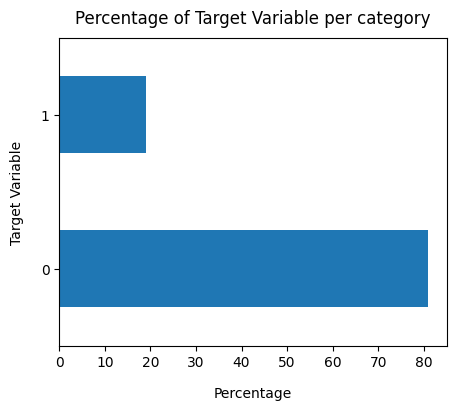

In [ ]:
prod_taken_percentage_distribution.plot(kind="barh", figsize=(5,4))
plt.xlabel("Percentage", labelpad=12)
plt.ylabel("Target Variable", labelpad=12)
plt.title("Percentage of Target Variable per category", y=1.02)
plt.show()

- Data is highly imbalanced, ratio = 81:19

- So, we analyze the data with other features while target variable separtely to get some insights. It means looking at the data by separating customers who did not take product and those who took product, then analyzing their other features to find the patterns or insights that explain why some customers did not take product.

# Univariate Analysis

In [ ]:
for i in df.columns:
    if df[i].dtypes == "object" and i != "CustomerID":
        percentage_distribution = round((df[i].value_counts() / len(df)) * 100, 0)
        print(percentage_distribution)
        print("\n")

ProdTaken
0    81.0
1    19.0
Name: count, dtype: float64


TypeofContact
Self Enquiry       71.0
Company Invited    29.0
Name: count, dtype: float64


CityTier
1    65.0
3    31.0
2     4.0
Name: count, dtype: float64


Occupation
Salaried          48.0
Small Business    43.0
Large Business     9.0
Freelancer         0.0
Name: count, dtype: float64


Gender
Male      60.0
Female    40.0
Name: count, dtype: float64


ProductPitched
Basic           38.0
Deluxe          35.0
Standard        15.0
Super Deluxe     7.0
King             5.0
Name: count, dtype: float64


PreferredPropertyStar
3.0    62.0
5.0    20.0
4.0    19.0
Name: count, dtype: float64


MaritalStatus
Married     48.0
Single      33.0
Divorced    19.0
Name: count, dtype: float64


Passport
0    71.0
1    29.0
Name: count, dtype: float64


OwnCar
1    62.0
0    38.0
Name: count, dtype: float64


Designation
Executive         38.0
Manager           35.0
Senior Manager    15.0
AVP                7.0
VP                 5.0
Nam

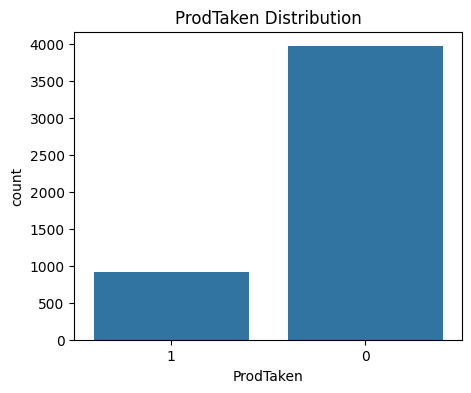

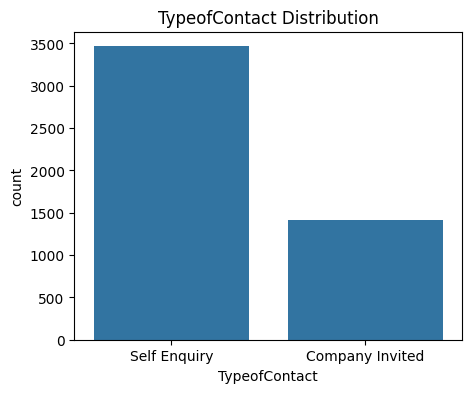

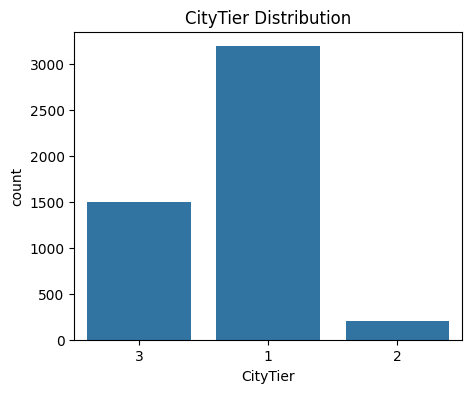

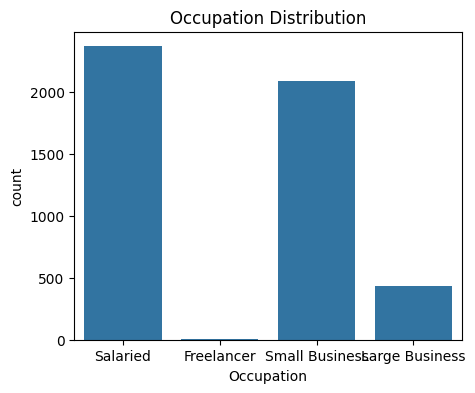

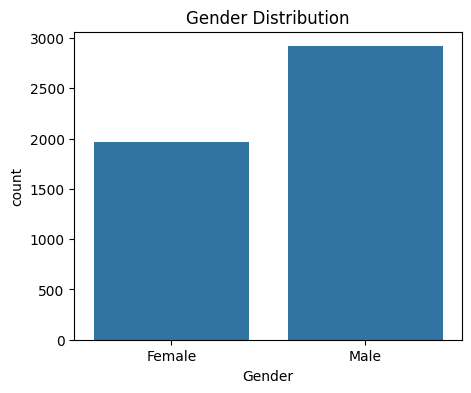

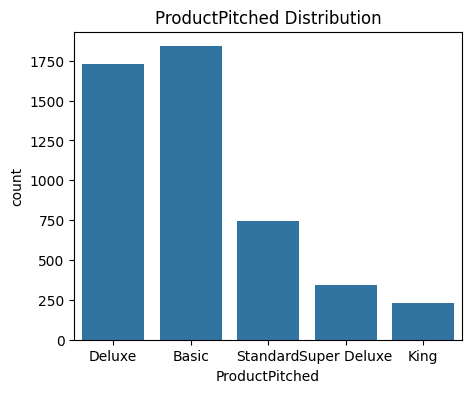

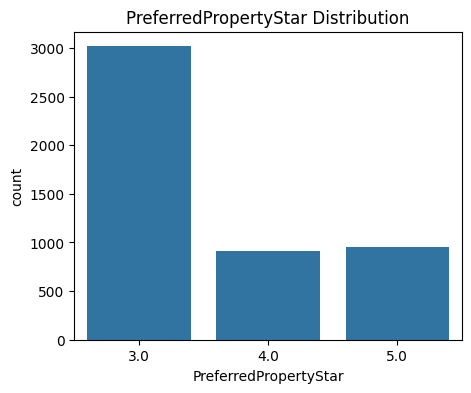

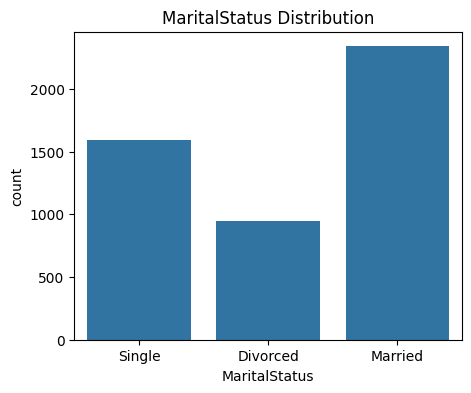

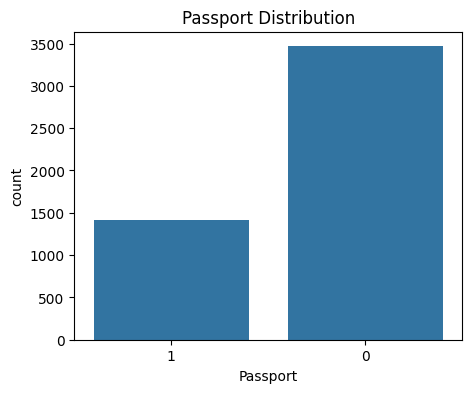

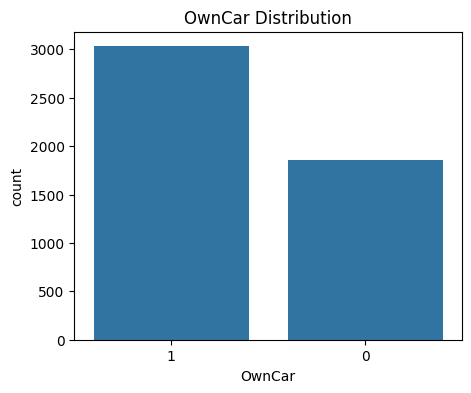

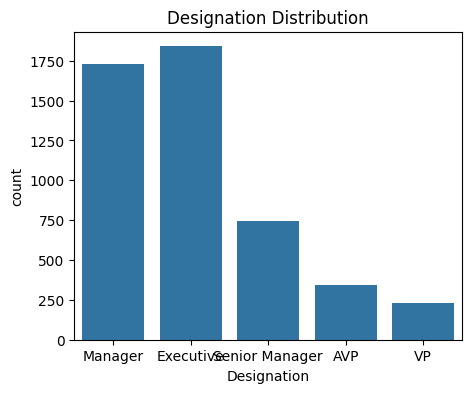

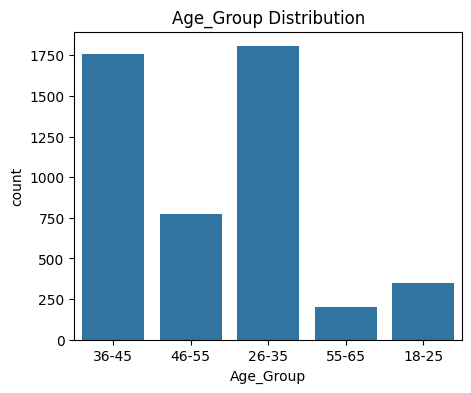

In [ ]:
for i in df.columns:
    if (df[i].dtypes == "object") and (i != "CustomerID"):
        plt.figure(figsize=(5, 4))
        sns.countplot(data=df, x=i)
        plt.title(f"{i} Distribution")
        plt.show()

<b>Insights</b>

- 81% of customers did not take the product, while 19% did.

- 71% of customers initiated contact through self-enquiry, while 29% were company-invited.

- 65% of customers are from City Tier 1, 31% from City Tier 3, and 4% from City Tier 2.

- 48% of customers are salaried, 43% are small business owners, 9% are large business owners, and 0% are freelancers.

- 60% of customers are male, and 40% are female.

- 38% of customers were pitched the Basic product, 35% Deluxe, 15% Standard, 7% Super Deluxe, and 5% King.

- 62% of customers prefer 3-star properties, 20% prefer 5-star, and 19% prefer 4-star.

- 48% of customers are married, 33% are single, and 19% are divorced.

- 71% of customers do not have a passport, while 29% do.

- 62% of customers own a car, while 38% do not.

- 38% of customers are Executives, 35% Managers, 15% Senior Managers, 7% AVP, and 5% VP.

- 37% of customers are aged 26-35, 36% are 36-45, 16% are 46-55, 7% are 18-25, 4% are 55-65.

# Bivariate Analysis

In [ ]:
for i in df.columns:
    if (df[i].dtypes == "object") and (i not in ["ProdTaken", "CustomerID"]):
        frequency_distribution = pd.crosstab(df[i], df["ProdTaken"])
        print(frequency_distribution)
        print("\n")

ProdTaken           0    1
TypeofContact             
Company Invited  1109  310
Self Enquiry     2855  610


ProdTaken     0    1
CityTier            
1          2666  520
2           152   46
3          1146  354


ProdTaken          0    1
Occupation               
Freelancer         0    2
Large Business   312  120
Salaried        1952  414
Small Business  1700  384


ProdTaken     0    1
Gender              
Female     1626  342
Male       2338  578


ProdTaken          0    1
ProductPitched           
Basic           1288  552
Deluxe          1526  204
King             210   20
Standard         618  124
Super Deluxe     322   20


ProdTaken                 0    1
PreferredPropertyStar           
3.0                    2528  488
4.0                     731  182
5.0                     705  250


ProdTaken         0    1
MaritalStatus           
Divorced        824  124
Married        2014  326
Single         1126  470


ProdTaken     0    1
Passport            
0          3040  42

In [ ]:
for i in df.columns:
    if (df[i].dtypes == "object") and (i not in ["ProdTaken", "CustomerID"]):
        frequency_distribution = pd.crosstab(df[i], df["ProdTaken"], normalize="index") * 100
        frequency_distribution = round(frequency_distribution, 0)
        print(frequency_distribution)
        print("\n")

ProdTaken           0     1
TypeofContact              
Company Invited  78.0  22.0
Self Enquiry     82.0  18.0


ProdTaken     0     1
CityTier             
1          84.0  16.0
2          77.0  23.0
3          76.0  24.0


ProdTaken          0      1
Occupation                 
Freelancer       0.0  100.0
Large Business  72.0   28.0
Salaried        83.0   17.0
Small Business  82.0   18.0


ProdTaken     0     1
Gender               
Female     83.0  17.0
Male       80.0  20.0


ProdTaken          0     1
ProductPitched            
Basic           70.0  30.0
Deluxe          88.0  12.0
King            91.0   9.0
Standard        83.0  17.0
Super Deluxe    94.0   6.0


ProdTaken                 0     1
PreferredPropertyStar            
3.0                    84.0  16.0
4.0                    80.0  20.0
5.0                    74.0  26.0


ProdTaken         0     1
MaritalStatus            
Divorced       87.0  13.0
Married        86.0  14.0
Single         71.0  29.0


ProdTaken     0    

### Plot distribution of individual predictors by ProdTaken

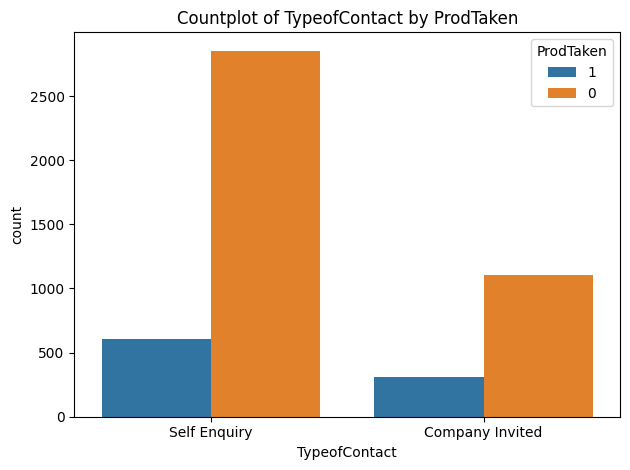

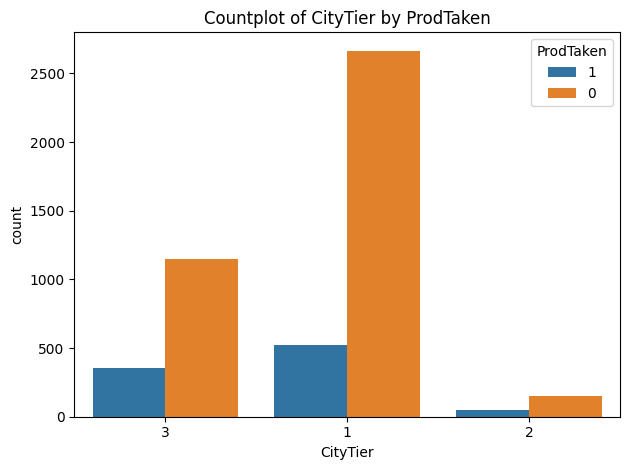

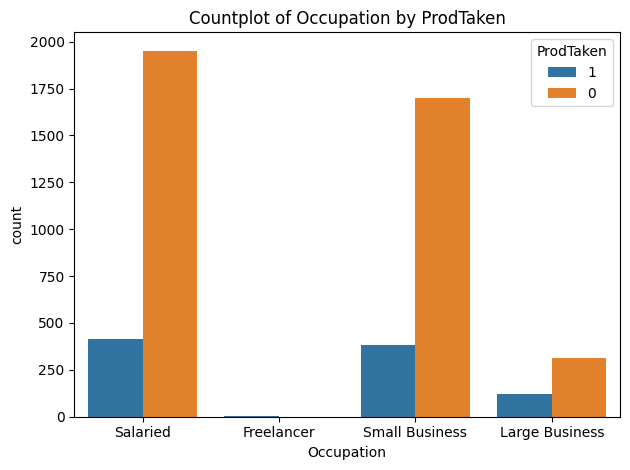

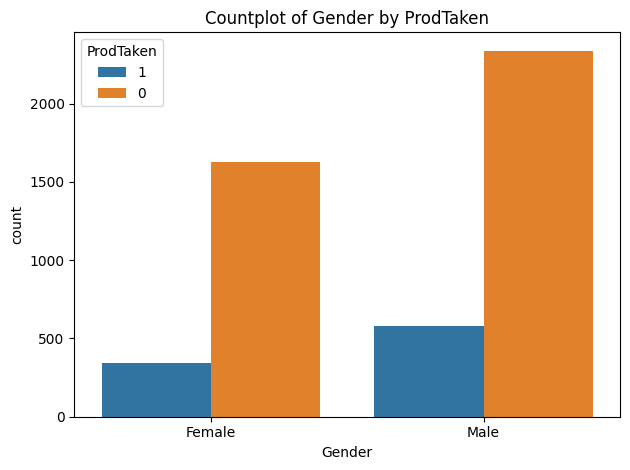

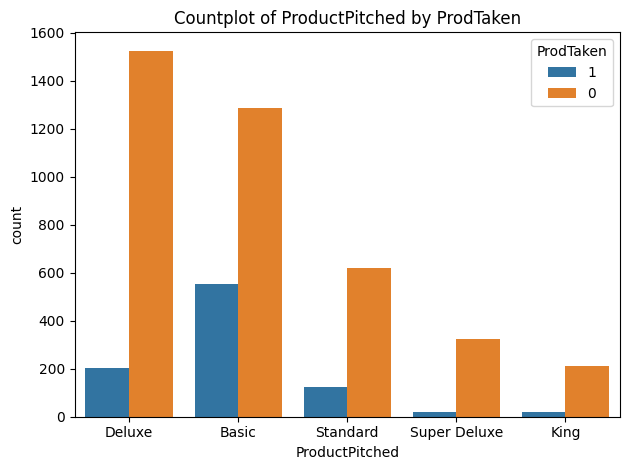

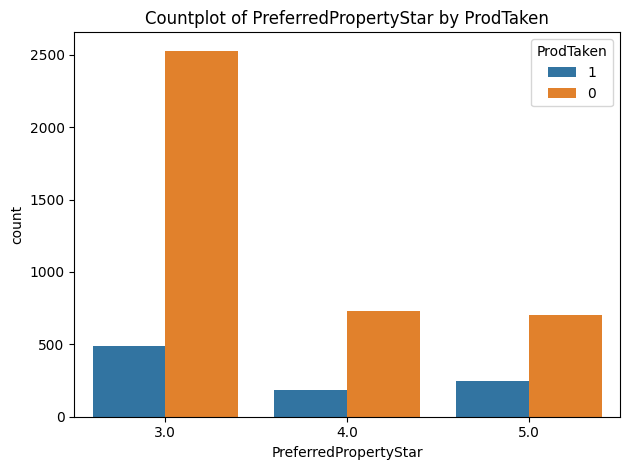

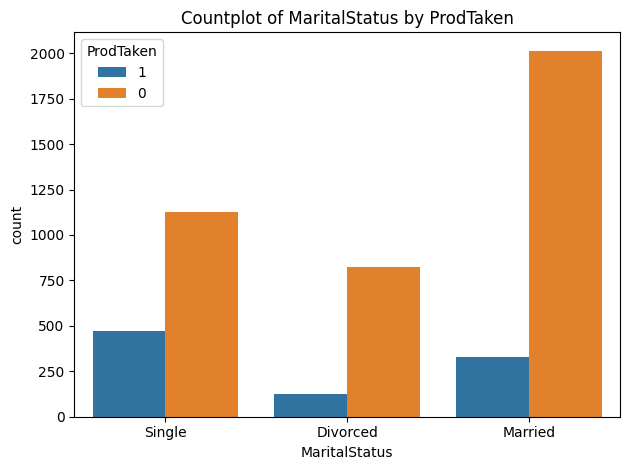

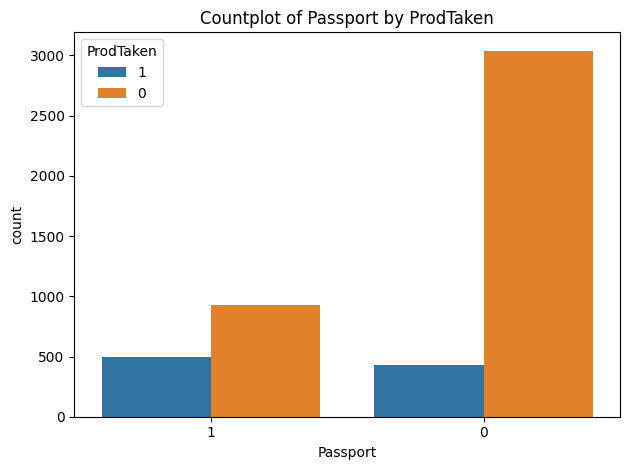

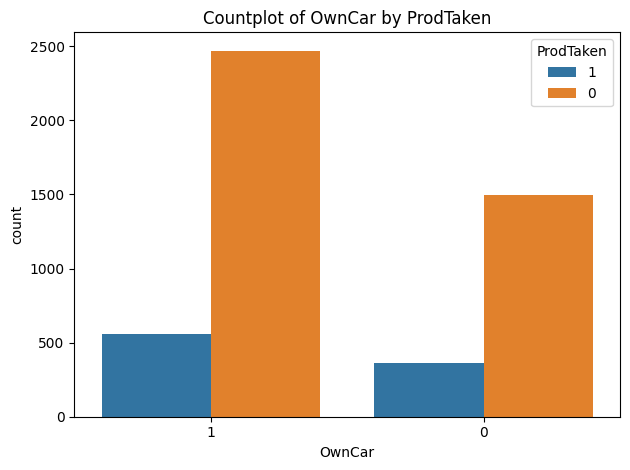

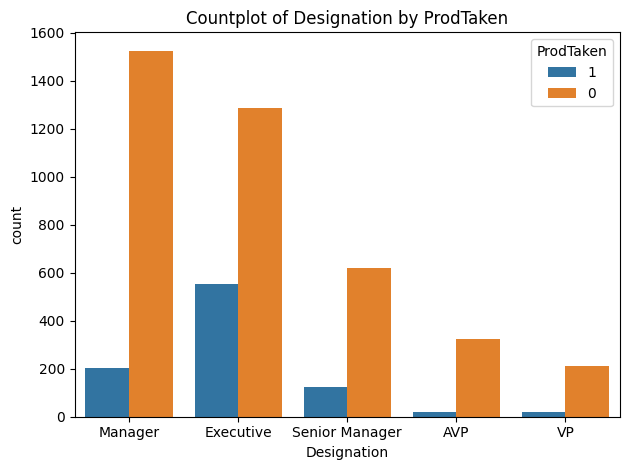

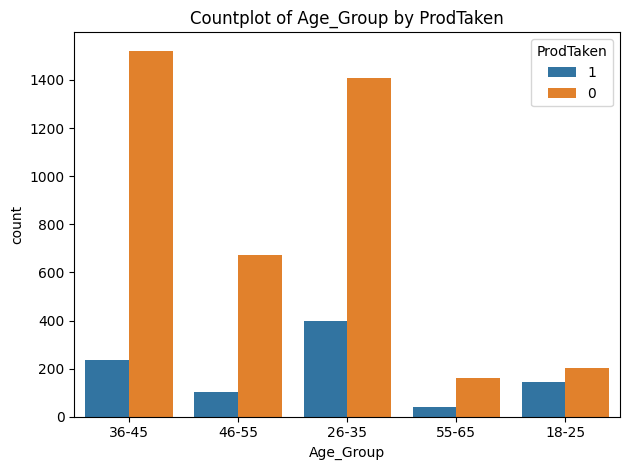

In [ ]:
predictors = [i for i in df.columns if (df[i].dtypes == "object") and (i not in ["ProdTaken", "CustomerID"])]

for i, predictor in enumerate(predictors):
    plt.figure(i)
    sns.countplot(x=predictor, data=df, hue="ProdTaken")
    plt.title(f'Countplot of {predictor} by ProdTaken')
    plt.legend(title='ProdTaken')
    plt.tight_layout()
    plt.show()

<b>Insights</b>

- <b>TypeofContact</b>: Customers who were invited by the company are slightly more likely to take the product compared to those who enquired themselves.

- <b>CityTier</b>: Customers from City Tier 2 and 3 are more likely to take the product compared to those from City Teir 1.

- <b>Occupation</b>: All freelancer took the product. Large business owners are more likely to take the product compared to salaried and small business owners.

- <b>Gender</b>: Males are slighlty more likely to take the product compared to females.

- <b>ProductPitched</b>: Customers pitched with the Basic product are more likely to take it compared to other product types. Super Deluxe and King products have the lowest acceptance rates.

- <b>PreferredPropertyStart</b>: Customers preferring 5-star properties are more likely to take the product compared to those preferring 3-star or 4-star properties.

- <b>MaritalStatus</b>: Single customers are significantly more likely to take the product compared to divorced and married customers.

- <b>Passport</b>: Customers with a passort are more likely to take the product compared to those without a passport.

- <b>OwnCar</b>: The likehood of taking the product is almost the same for customers whether they own a car or not.

- <b>Designation</b>: Executives are more likely to take the product compared to other designation. AVP and VP have the lowest acceptance rates.

- <b>Age_Group</b>: Younger customers, particularly those aged 18-25, are more likely to take the product compared to older age groups.

# Numerical Analysis

In [ ]:
for i in df.columns:
    if i.endswith("_STD") or i=="Age":
        df.drop(i, axis=1, inplace=True)

In [ ]:
num_df = df.select_dtypes("number")
num_df.head()

,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
0,6.0,3,3.0,1.0,2,0.0,20993.0
1,14.0,3,4.0,2.0,3,2.0,20130.0
2,8.0,3,4.0,7.0,3,0.0,17090.0
3,9.0,2,3.0,2.0,5,1.0,17909.0
4,8.0,2,3.0,1.0,5,0.0,18468.0


## Summary Statistics

In [ ]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DurationOfPitch,4884.0,15.366912,8.318345,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4884.0,2.905405,0.724953,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4884.0,3.710893,0.998440,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4884.0,3.229934,1.822942,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4884.0,3.077805,1.365623,1.0,2.00,3.0,4.00,5.0
NumberOfChildrenVisiting,4884.0,1.185299,0.852326,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4884.0,23537.656224,5028.841812,16009.0,20485.75,22347.0,25415.25,38677.0


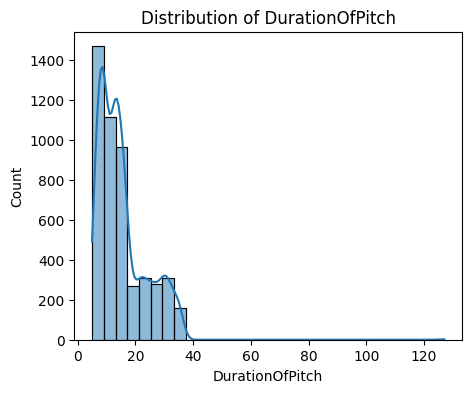

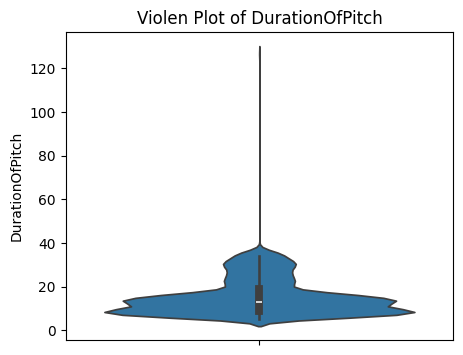

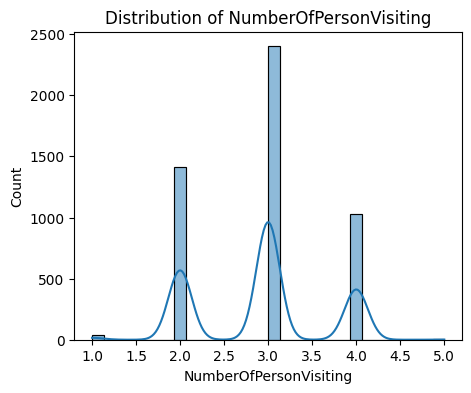

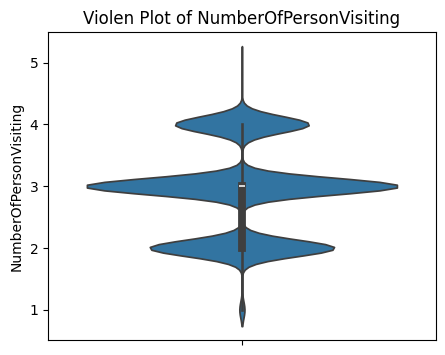

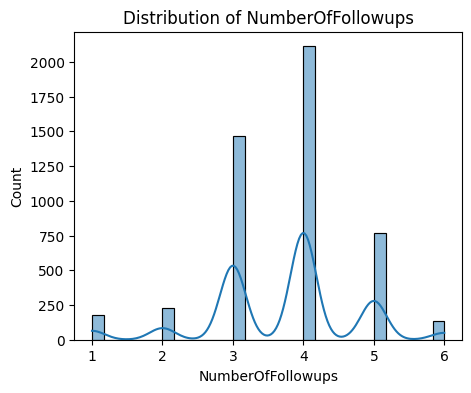

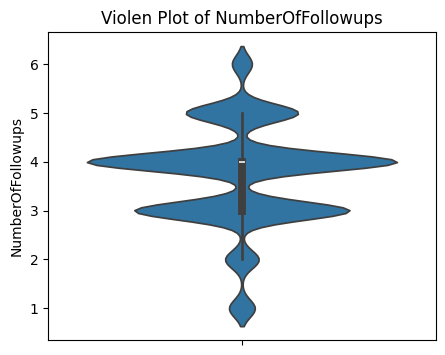

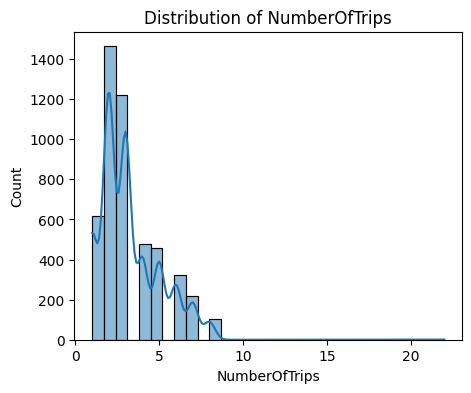

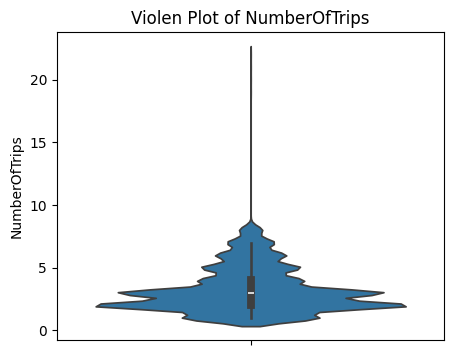

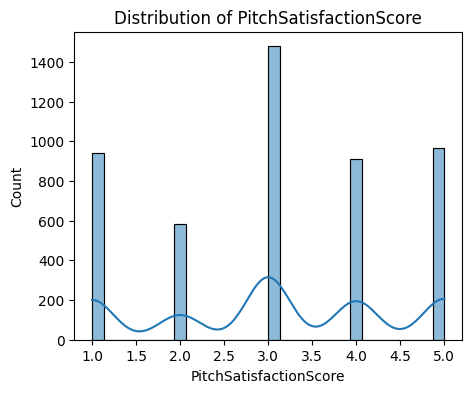

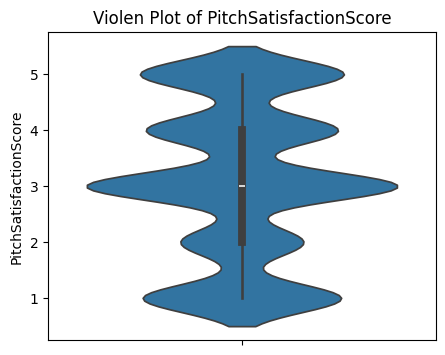

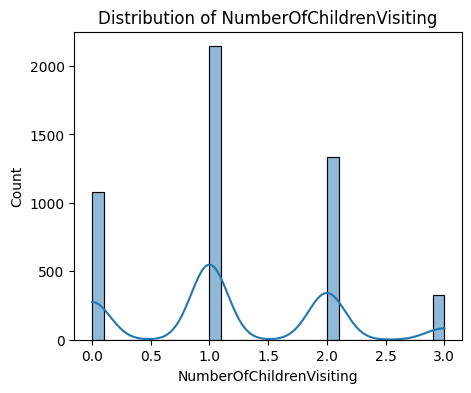

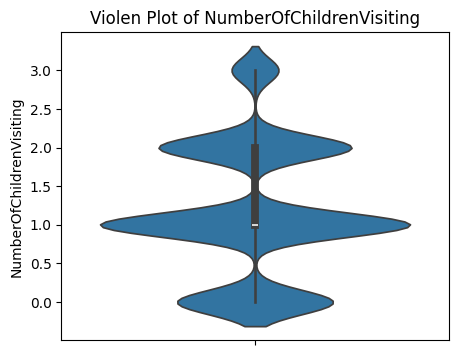

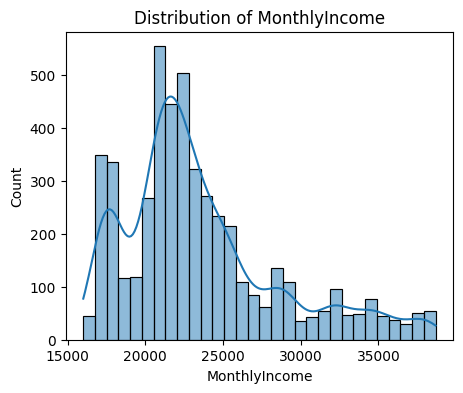

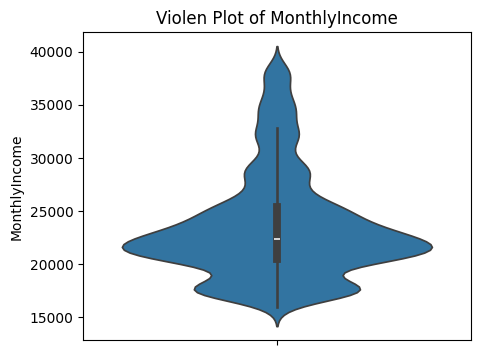

In [ ]:
for i in df.columns:
    if df[i].dtypes != "object":
        plt.figure(figsize=(5, 4))
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.show()

        plt.figure(figsize=(5, 4))
        sns.violinplot(data=df, y=i)
        plt.title(f'Violen Plot of {i}')
        plt.show()

<b>Insights</b>

- <b>DurationOfPitch</b>: Sales pitches typically last around 15 minutes, with some extending up to 127 minutes, suggesting varying levels of complexity in customer interactions.

- <b>NumberOfPersonVisting</b>: On average, about 3 people attend sales pitches, indicating potential multiple decision-makers or stakeholders involved in the buying process.

- <b>NumberOfFollowups</b>: There are approximately 4 follow-ups per pitches, demonstrating persistent efforts to engage and convert potential customers.

- <b>NumberOfTrips</b>: Customers typically make about 3 trips (inquiries) on average, indicating thorough exploration or consideration before making a decision.

- <b>PitchSatisfactionScore</b>: The average satisfaction score is 3 out of 5, highlighting areas for improvement in customer experience during sales interaction.

- <b>NumberOfChildrenVisting</b>: On average, 1 child accompanies visitors, reflecting family involvement that could influenece purchasing decisions.

- <b>MonthlyIncome</b>: Customer's average monthly income is 24000, ranging from 15000 to 40000, indicating their economic capacity and potential spending power.

<b>Key Factors</b>:

- <b>Customer Engagement and Decision-Making</b>: Multiple stakeholders are involved, and customers thoroughly explore options through interactions.

- <b>Customer Satisfaction</b>: There are opportunities to make customers happier and improve their overall buying experience.

- <b>Family Influence</b>: Consideration of family dynamics in purchasing decisions, impacting decision-making processes.

- <b>Economic Capacity</b>: Knowing customers' incomes hepls adjust prices and offering to fit their finanical situations.

## Build a correlation of all predictors with 'ProdTaken'

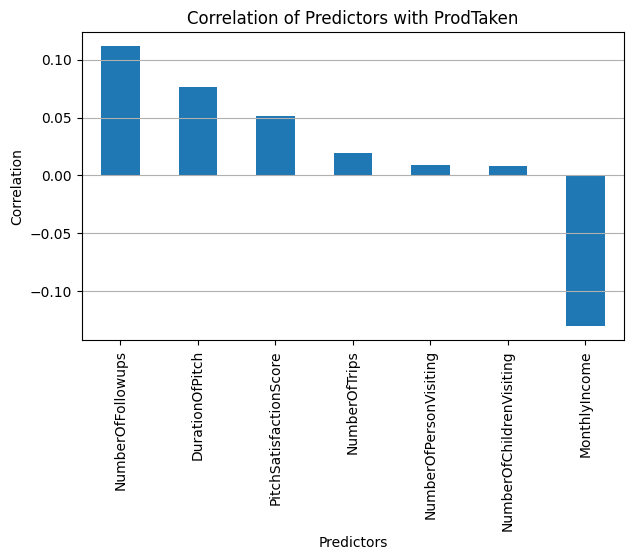

In [ ]:
corr_with_ProdTaken = num_df.corrwith(df["ProdTaken"]).sort_values(ascending=False)
plt.figure(figsize=(7,4))
corr_with_ProdTaken.plot(kind="bar")
plt.title("Correlation of Predictors with ProdTaken")
plt.xlabel("Predictors")
plt.ylabel("Correlation")
plt.grid(axis="y")
plt.show()                                                                     # threshold value =

<b>Insights</b>:

- <b>Follow-ups are Crucial</b>: More follow-ups significantly increase the likehood of the product being taken.

- <b>Pitch Quality and Length Matter</b>: Longer, satisfactory pitches postively impact product acceptance.

- <b>Income Impact</b>: Higher monthly income is associated with a lower likelihood of taking the product.

- <b>Minor Factors</b>: The number of trips has a slight positive effect, while household size has minimal impact.

<b>Dervied Insight:</b>

- Focus on follow-ups, quality pitches and tagert lower income demographics for better results.

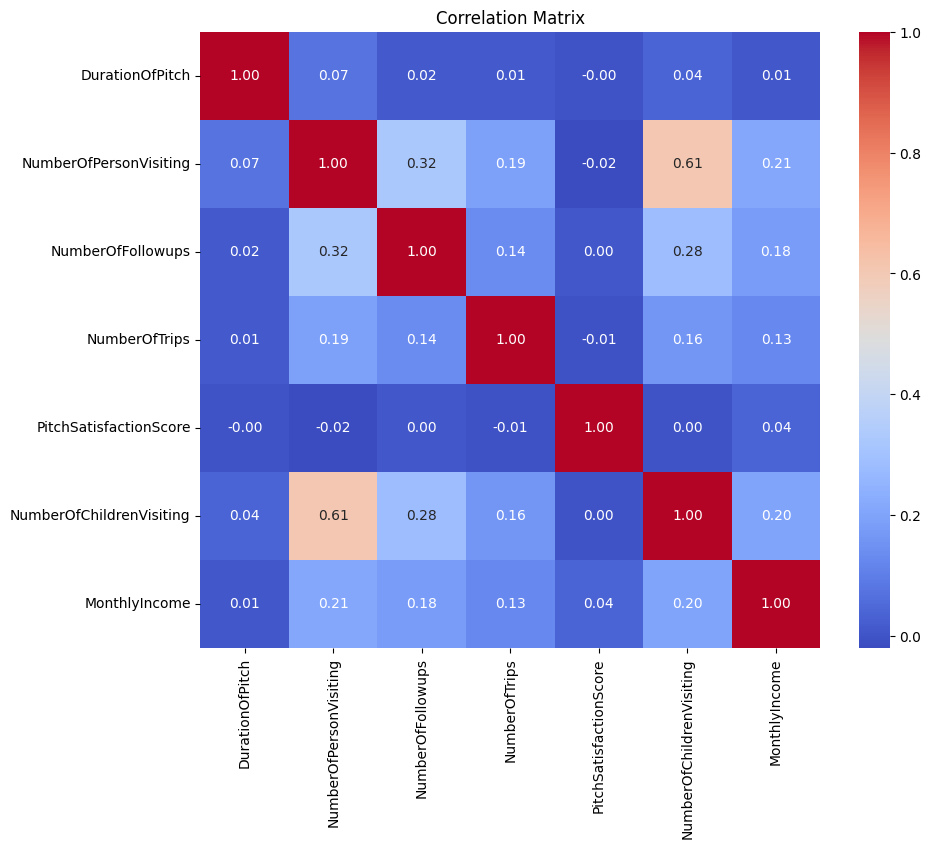

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis

In [ ]:
df_target0 = df[df["ProdTaken"] == "0"]
df_target1 = df[df["ProdTaken"] == "1"]

In [ ]:
def catplot_(df, x, hue, col):
    sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=6, aspect=1.2)
    plt.suptitle(f'{x} vs. {hue} by {col}')
    plt.show()

## Gender and Marital Status

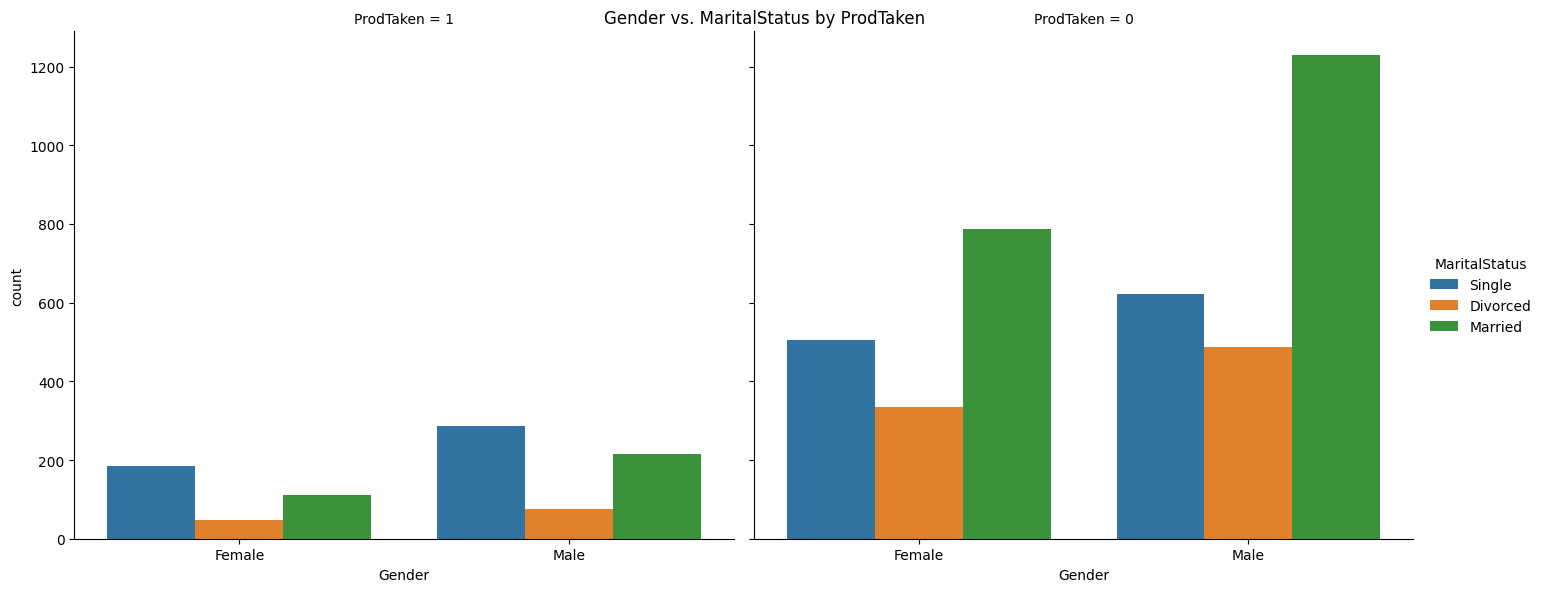

In [ ]:
catplot_(df, x='Gender', hue='MaritalStatus', col='ProdTaken')

## Occupation and Product Pitched

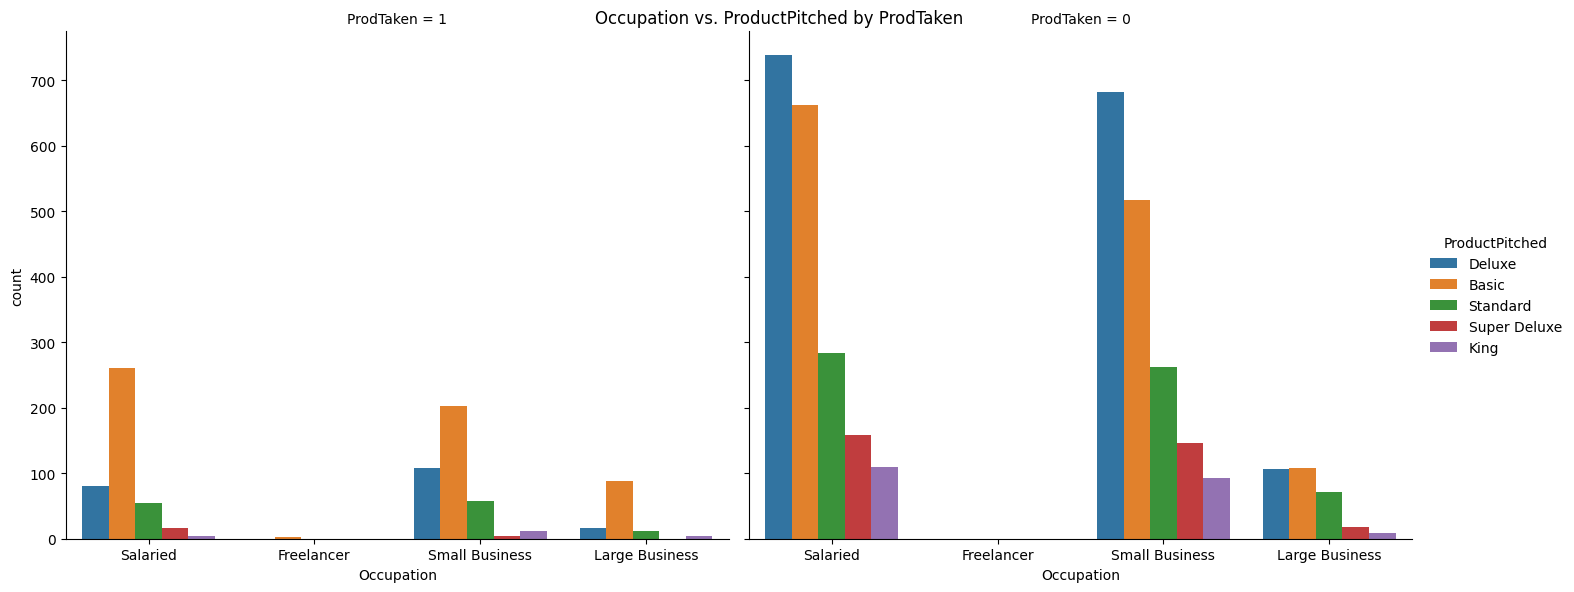

In [ ]:
catplot_(df, x='Occupation', hue='ProductPitched', col='ProdTaken')

## CityTier and Preferred Property Star

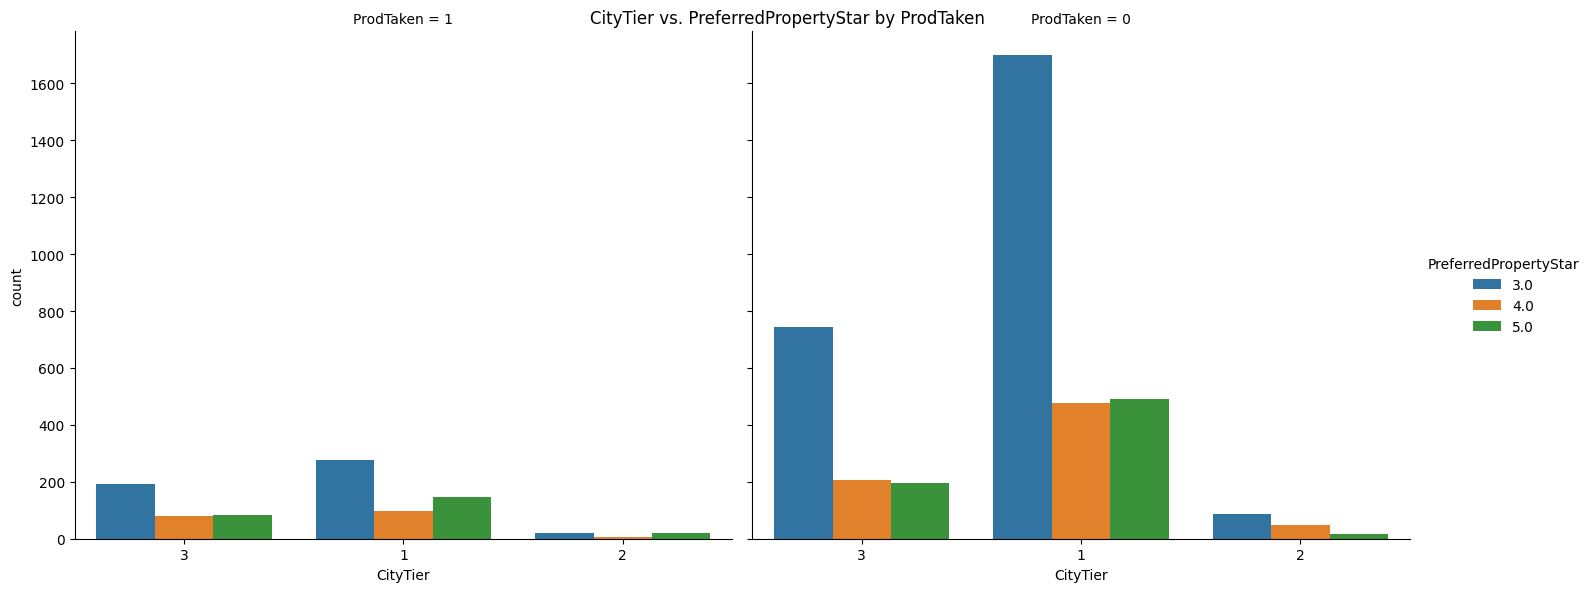

In [ ]:
catplot_(df, x='CityTier', hue='PreferredPropertyStar', col='ProdTaken')

## Age Group and Designation

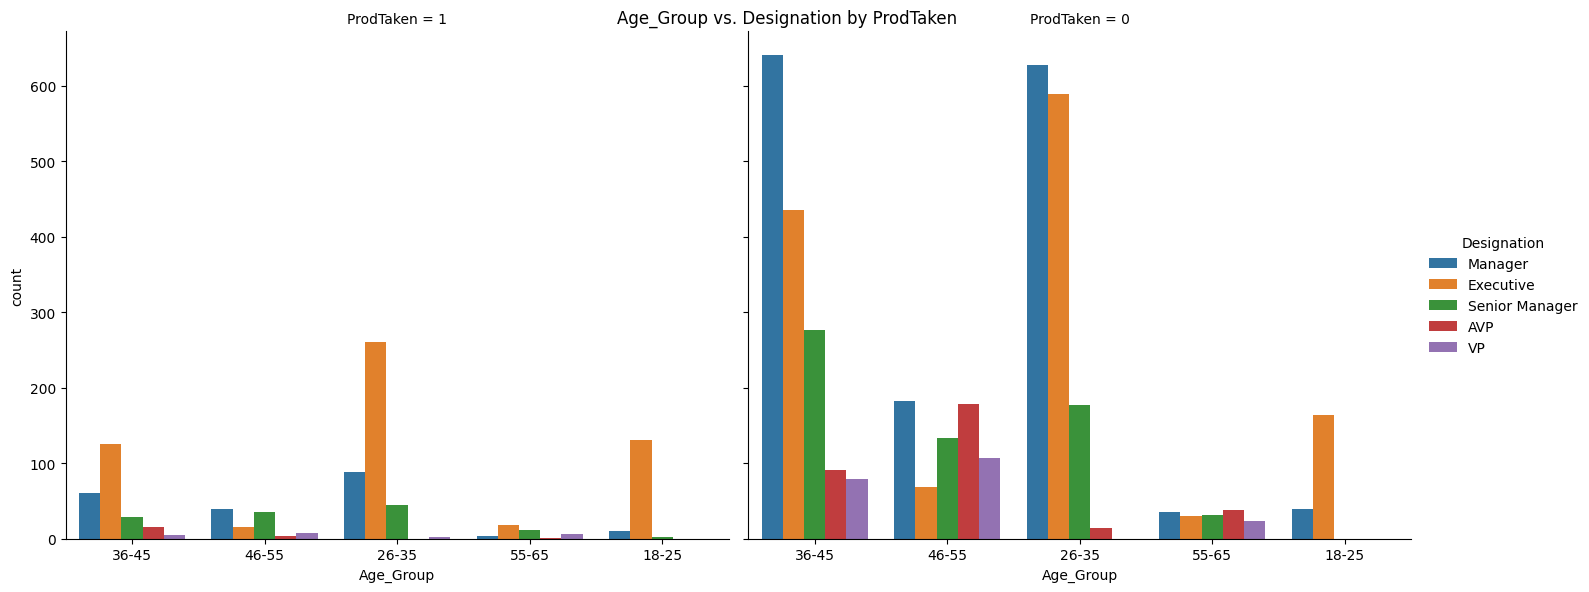

In [ ]:
catplot_(df, x='Age_Group', hue='Designation', col='ProdTaken')

<b>Insights:</b>

- Males who didn't take the product are predominantly married, whereas females who took the product are more likely to be single.

- Salaried individuals are the largest group who didn't take the product, and among those who did take the product, the 'Basic' product is the most popular across all occupation types.

- Customers in CityTier 1 with a PreferredPropertyStar rating of 3.0 are the most common, especially among those who have not taken the product.

- Managers in the 36-45 age group are the most common, with a particularly high count among those who have not taken the product.

<h1>Conclusion</h1>

Based on the insights gathered from the data:

<b>Customer Engagement and Decision-Making:</b>

- 81% of customers did not take the product, indicating a significant opportunity for improvement in conversion rates.

- Self-enquiry (71%) is the predominant method of customer initiation, suggesting a proactive approach to sales engagement is crucial.


<b>Demographic Insights:</b>

- City Tier 2 and 3 customers show a higher likelihood of product acceptance compared to Tier 1, highlighting potential geographical preferences or economic factors.

- Large business owners and freelancers show higher acceptance rates than salaried and small business owners, suggesting economic stability or different buying motivations.

<b>Gender and Marital Status:</b>

- Males slightly more often did not take the product compared to females, with married males showing higher non-acceptance.

- Single customers are significantly more likely to take the product compared to married or divorced individuals.

<b>Product and Property Preferences:</b>

- The Basic product has the highest acceptance rate, while the Super Deluxe and King products have the lowest, suggesting price sensitivity or perceived value discrepancies.

- Customers preferring 5-star properties are more likely to take the product, indicating a correlation between lifestyle preferences and purchasing decisions.

<b>Occupation and Designation:</b>

- Executives and Managers are more likely to take the product compared to other designations, with AVPs and VPs showing the lowest acceptance rates.

<b>Age and Passport Ownership:</b>

- Younger age groups, particularly 18-25, are more likely to accept the product, indicating a potential focus on younger demographics for higher conversion rates.

- Customers with passports are more inclined to take the product, potentially linked to travel preferences or economic capacity.

<b>Follow-up and Pitch Quality:</b>

- Increased follow-ups positively influence product acceptance, emphasizing the importance of persistent engagement.

- Longer and satisfactory sales pitches correlate with higher acceptance rates, suggesting a need for comprehensive and compelling presentations.

<h2>Final Conclusion</h2>

<b>Based on comprehensive data analysis and insights:</b>

- <b>Targeted Strategies:</b> Focus on Tier 2 and 3 cities, large business owners, and younger demographics (especially singles and passport holders) for higher conversion rates.

- <b>Product and Pitch Optimization:</b> Emphasize the Basic product pitch quality and consider tailored approaches for different occupation levels and gender preferences.

- <b>Engagement Tactics:</b> Enhance follow-up strategies to improve engagement with potential customers, leveraging the identified preference for multiple interactions.

- <b>Market Positioning:</b> Adjust marketing efforts towards 5-star property preferences and consider economic factors influencing decision-making, particularly among different income brackets.

Implementing these recommendations can potentially increase product uptake by addressing specific demographic preferences, optimizing engagement tactics, and refining product offerings based on customer insights.